# OpenCV & Face Detection
### OpenCV library can be used for object detection and face detection in python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Install OpenCV

In [2]:
!pip install opencv-python

    100% |████████████████████████████████| 52.1MB 305kB/s eta 0:00:01    23% |███████▌                        | 12.2MB 10.3MB/s eta 0:00:04    81% |██████████████████████████      | 42.3MB 7.9MB/s eta 0:00:02
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import cv2

%matplotlib inline

### Load an Image
* use cv2.imread( )

In [8]:
img_raw = cv2.imread('../../Downloads/mandrill_colour.png')

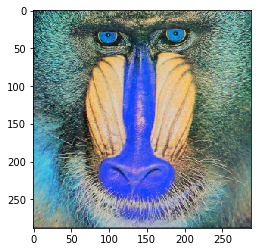

In [9]:
plt.imshow(img_raw)

### Check details about the image

In [10]:
type(img_raw)

numpy.ndarray

In [11]:
img_raw.shape

(288, 288, 3)

### OpenCV and Matplotlib use different orders of Primary Colors
* OpenCV reads BGR
* Matplotlib reads RGB
* transform the channel - using cvtColor

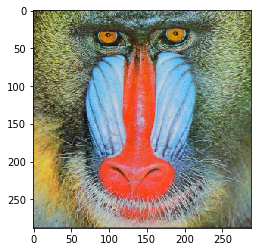

In [13]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

## Basic OpenCV Operations on Images
* Draw various lines and shapes onto images

### Start with a blank image

In [14]:
image_blank = np.zeros(shape=(512, 512, 3), dtype=np.int16)

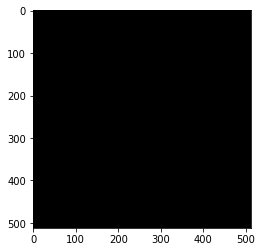

In [15]:
plt.imshow(image_blank)

### The general function for adding these elements to images is as follows:

In [16]:
# cv2.shape(image, Pt1, Pt2, color, thickness)

* shape - could be line, rectangle, etc.
* Pt1, Pt2 - shape coordinates on the image - represented as (0, 0) for each top L, bottom R
* color - is represented as (R, G, B)
* thickness - in pixels, as an integer

### Draw straight Red and Green lines over images
* Increase the thickness of the Green line

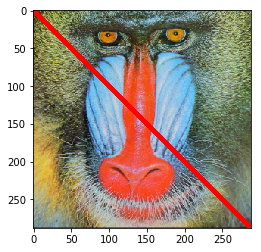

In [17]:
line_red = cv2.line(img, (0,0), (511,511), (255,0,0), 5)
plt.imshow(line_red)

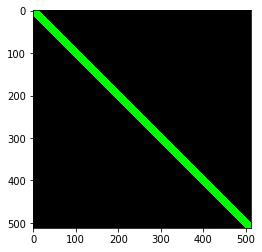

In [19]:
line_green = cv2.line(image_blank,(0,0), (511,511), (0,255,0), 15)
plt.imshow(line_green)

### Place a Blue rectangle over an image

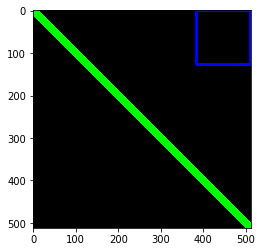

In [20]:
rectangle = cv2.rectangle(image_blank, (384,0), (510,128), (0,0,255), 5)
plt.imshow(rectangle)

### Place a Blue circle in the rectangle

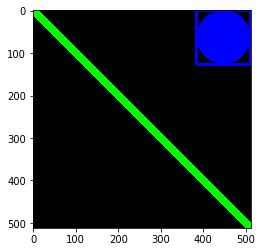

In [22]:
circle = cv2.circle(image_blank, (447, 63), 63, (0,0,255), -1)
plt.imshow(circle)

### Text can be written onto images as well
* similar arguments, with a few additions/changes
    * following the image, place the 'text'
    * the coordinates, begins from the bottom left
    * the font type, followed by the scale of the font as an integer
    * then, similar to above, is the color and thickness
    * lastly, the line type - lineType = cv2.LINE_AA

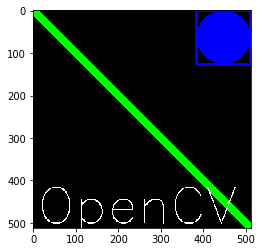

In [24]:
font= cv2.FONT_HERSHEY_SIMPLEX

text = cv2.putText(image_blank, 'OpenCV', (10,500), font, 4, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(text)

## Face Detection
* OpenCV has 2 pre-trained face detection classifiers:
    * Haar Classifier
    * Local Binary Pattern (LBP) Classifier

### Haar Classifier
* Haar features - kind of convolutional kernel, which detects whether certain features are present
    * i.e. edge features, line features, four-rectangle features
* Adaboost - ML algorithm selects the best features recognized, out of all features
    * focusing on those that help improve accuracy
    * constructs a strong classifier - linear combination of weak classifiers
* a Cascade of classifiers - stages where each stage is a classifier, focused on a sub-window of the image

### Load an image - to be tested in grayscale

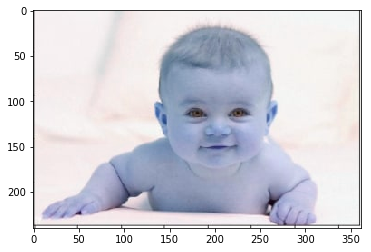

In [25]:
test_image = cv2.imread('../../Downloads/baby1.jpeg')

test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image, cmap='gray')

### Write a function to handle OpenCV loading images in BGR
* to convert the image to RGB

In [33]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### OpenCV pre-trained classifiers - Haar cascade files
* can be downloaded from - https://github.com/parulnith/Face-Detection-in-Python-using-OpenCV/tree/master/data/haarcascades
* use the frontal face default

In [27]:
haar_cascade_face = cv2.CascadeClassifier('../../Downloads/haarcascade_frontalface_default.xml')

### Use the detectMultiscale module of the classifier
* it returns a rectangle with coordinates (x,y,w,h)
    * scalefactor parameter - compensates for faces nearer to the camera than others
    * minNeighbors parameter - specifies the # of neighbors a rectangle should have for a face

In [28]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2,
                                                 minNeighbors = 5);
print('Faces Found: ', len(faces_rects))

Faces Found:  1


### Display a Green rectangle, of thickness 2

In [29]:
for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x,y), (x+w, y+h), (0,255,0), 2)

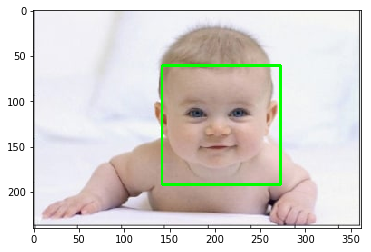

In [34]:
plt.imshow(convertToRGB(test_image))

### Create a generalized function for Face Detection
* apply the above - to a different image 

In [40]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    image_copy = test_image.copy()
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x,y,w,h) in faces_rect:
        cv2.rectangle(image_copy, (x,y), (x+w, y+h), (0,255,0), 15)
        
    return image_copy

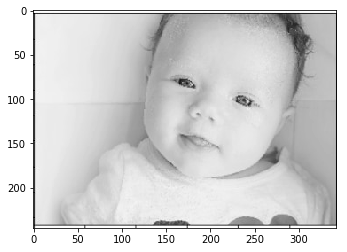

In [36]:
test_image2 = cv2.imread('../../Downloads/baby2.jpeg')

test_image_gray = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image_gray, cmap='gray')

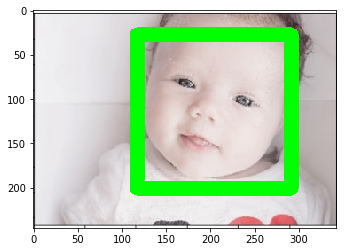

In [41]:
faces = detect_faces(haar_cascade_face, test_image2)

plt.imshow(convertToRGB(faces))